# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# Memuat dataset dari file CSV
df = pd.read_csv("Dataset_inisiasi.csv")

In [3]:
# Menampilkan 5 data pertama
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


- Dimensi dataset terdiri dari 2512 baris dan 16 kolom, mencakup berbagai informasi transaksi perbankan

- Dataset berisi informasi transaksi perbankan dengan fitur numerik seperti jumlah transaksi, saldo akun, durasi transaksi, dan jumlah percobaan login.
- Terdapat fitur kategorikal seperti jenis transaksi dan status pelanggan, yang dapat digunakan untuk segmentasi pelanggan.

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

#### 1. Memahami Struktur Data

In [4]:
# Menampilkan jumlah baris dan kolom
print("Jumlah baris dan kolom: \n", df.shape)

Jumlah baris dan kolom: 
 (2512, 16)


In [5]:
# Menampilkan informasi dataset dan statistik deskriptif
print("Informasi Dataset:\n")
df.info()
print("\nStatistik Deskriptif:\n")
df.describe()

Informasi Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  Acco

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [6]:
# Konversi kolom tanggal ke datetime
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])
df["PreviousTransactionDate"] = pd.to_datetime(df["PreviousTransactionDate"])

# Menampilkan informasi dataset setelah konversi tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

#### 2. Menangani Data yang Hilang

In [7]:
# Menampilkan jumlah nilai yang hilang di setiap kolom
df.isnull().sum()  

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

#### 3. Analisis Distribusi dan Korelasi


Ringkasan Statistik untuk Fitur Numerik:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000  


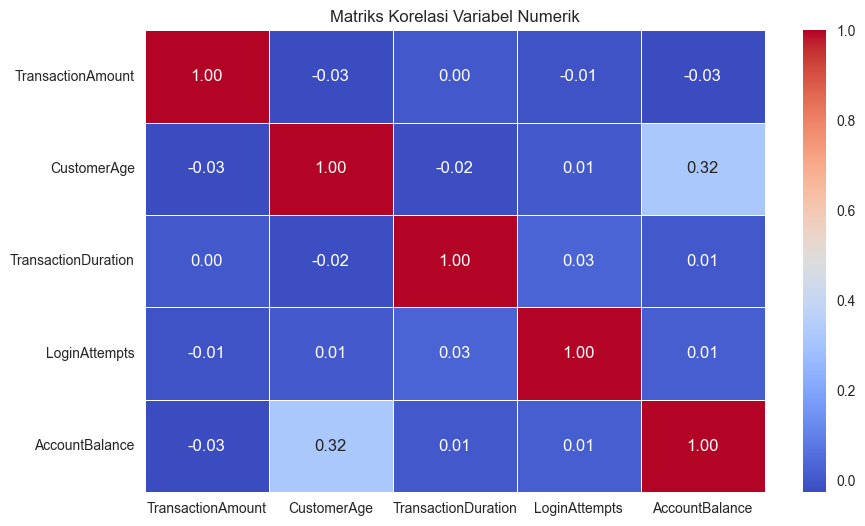

In [8]:
# Analisis Distribusi dan Korelasi
# Menampilkan ringkasan statistik untuk fitur numerik
print("\nRingkasan Statistik untuk Fitur Numerik:")
print(df.describe(include=['number']))

# Menghitung matriks korelasi
numerical_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_columns].corr()

# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Variabel Numerik")
plt.show()

#### 4. Visualisasi Data

<Figure size 1200x800 with 0 Axes>

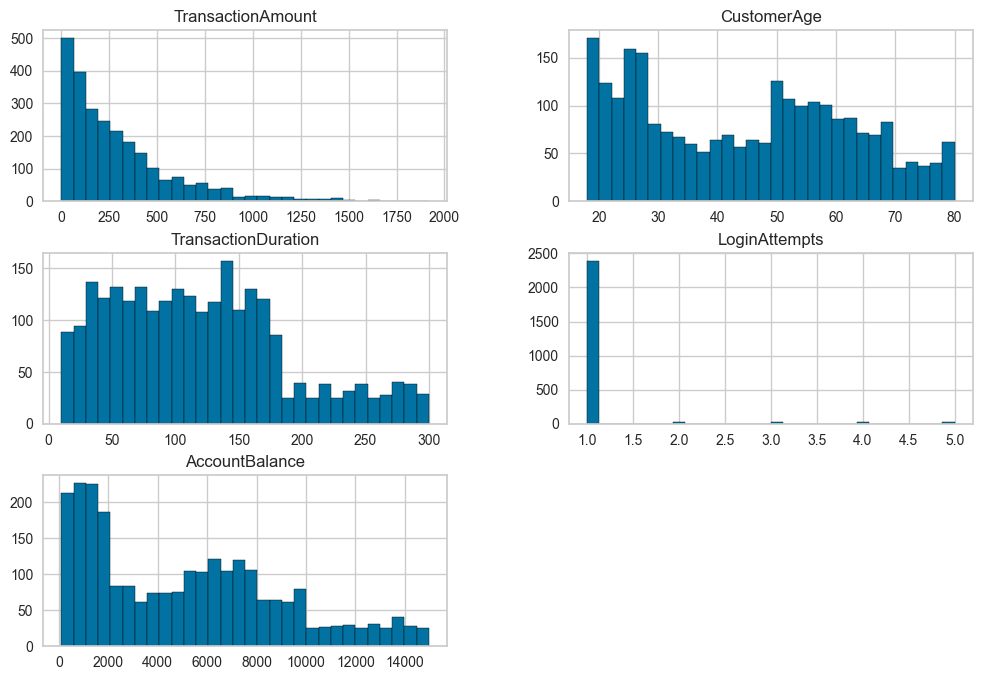

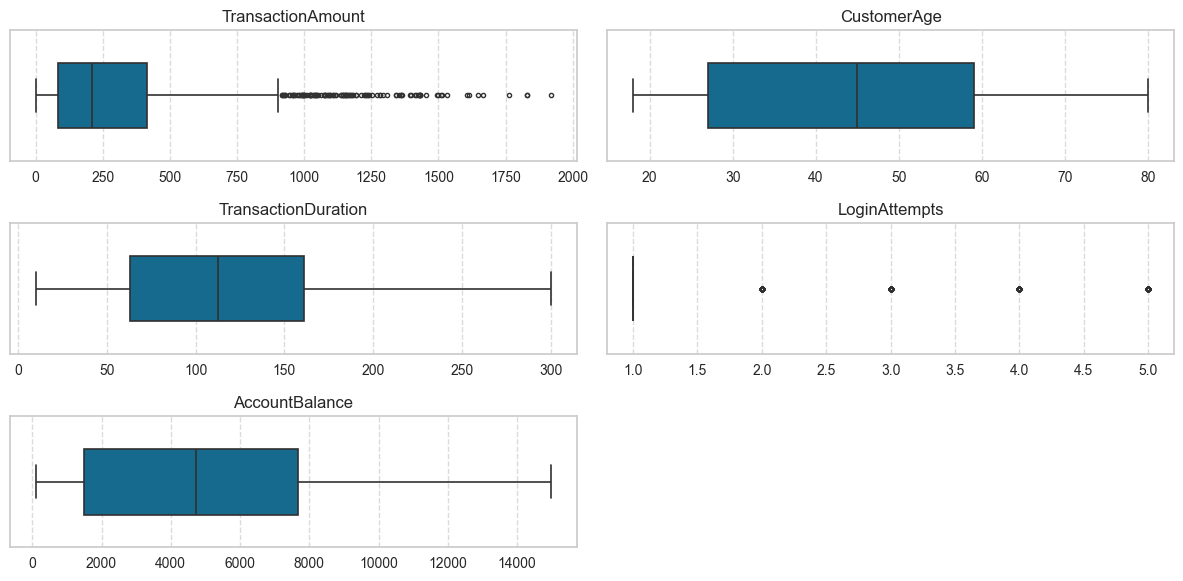

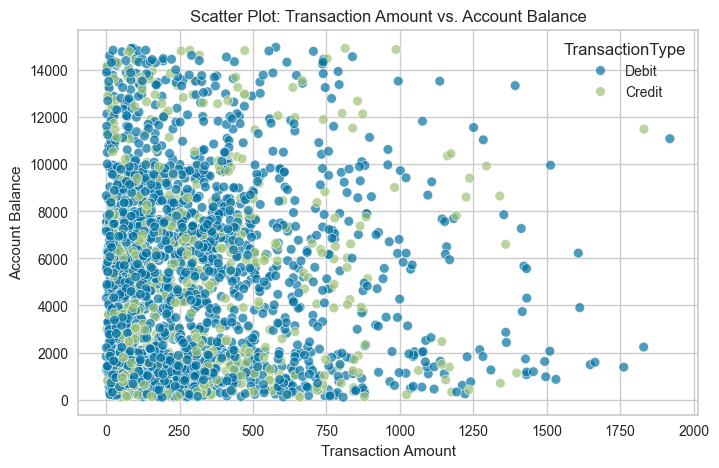

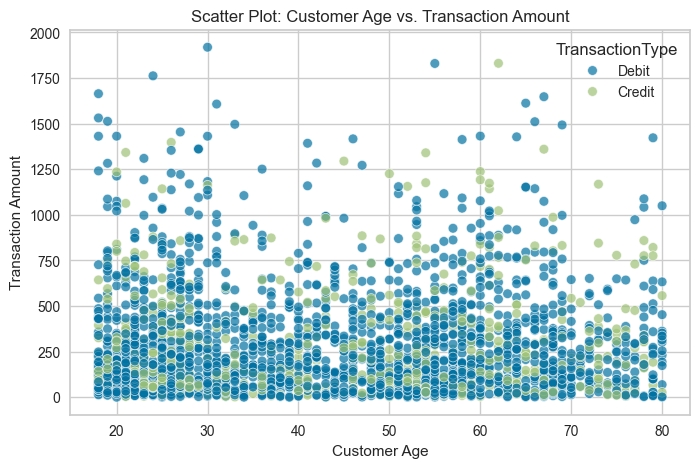

In [9]:
# Visualisasi Data
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Menampilkan histogram untuk variabel numerik
plt.figure(figsize=(12, 8))
df[numerical_columns].hist(bins=30, edgecolor='black', figsize=(12, 8))
plt.show()


# Boxplot untuk mendeteksi outlier pada variabel numerik 
plt.figure(figsize=(12, len(numerical_columns) * 2))  
# Membuat subplot untuk setiap variabel numerik
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, i)  
    sns.boxplot(x=df[col], fliersize=3, linewidth=1.2, width=0.5)
    plt.title(col, fontsize=12)
    plt.xlabel("")
    plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Mengatur tata letak agar tidak bertabrakan dengan judul
plt.show()


# Scatter plot antara jumlah transaksi dan saldo akun
plt.figure(figsize=(8, 5))
sns.scatterplot(x="TransactionAmount", y="AccountBalance", hue="TransactionType", data=df, alpha=0.7)
plt.title("Scatter Plot: Transaction Amount vs. Account Balance")
plt.xlabel("Transaction Amount")
plt.ylabel("Account Balance")
plt.show()

# Scatter plot antara usia pelanggan dan jumlah transaksi
if "CustomerAge" in df.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x="CustomerAge", y="TransactionAmount", hue="TransactionType", data=df, alpha=0.7)
    plt.title("Scatter Plot: Customer Age vs. Transaction Amount")
    plt.xlabel("Customer Age")
    plt.ylabel("Transaction Amount")
    plt.show()

## **Insight Exploratory Data Analysis (EDA)**

1. **Memahami Struktur Data**  
   - Dataset memiliki jumlah fitur yang mencakup data numerik dan kategorikal, yang perlu diperlakukan secara berbeda dalam analisis.

   - Kolom tanggal telah dikonversi ke format datetime untuk analisis berbasis waktu yang lebih akurat.

2. **Menangani Data yang Hilang**  
   - Tidak ditemukan nilai yang hilang dalam dataset, sehingga tidak diperlukan langkah imputasi atau penghapusan data.

   - Hal ini memastikan bahwa semua analisis dapat dilakukan tanpa kekhawatiran terhadap ketidakseimbangan akibat data yang hilang.

3. **Analisis Distribusi dan Korelasi**  
   - Distribusi beberapa fitur numerik menunjukkan adanya skewness, terutama pada jumlah transaksi dan saldo akun.

   - Boxplot mengidentifikasi beberapa outlier dalam fitur numerik, yang dapat memengaruhi hasil analisis dan perlu dipertimbangkan untuk penanganan lebih lanjut.

   - Korelasi antara fitur numerik menunjukkan adanya hubungan antara jumlah transaksi dan saldo akun, yang dapat menjadi indikasi pola perilaku pelanggan.

   - Scatter plot menunjukkan bahwa usia pelanggan dapat memengaruhi jumlah transaksi, memberikan wawasan tambahan untuk segmentasi pelanggan.

4. **Visualisasi Data**  
   - Histogram fitur numerik menunjukkan pola distribusi yang beragam, mengindikasikan bahwa beberapa fitur perlu transformasi untuk analisis lebih lanjut.

   - Heatmap korelasi mengungkapkan hubungan antar fitur, yang dapat digunakan untuk menghindari multicollinearity dalam model.

   - Scatter plot mengonfirmasi adanya perbedaan perilaku transaksi berdasarkan kategori pelanggan atau jenis transaksi, memberikan petunjuk penting dalam analisis clustering.


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

#### 1. Menghapus atau Menangani Data Kosong (Missing Values)

In [10]:
# Menghapus atau Menangani Data Kosong (Missing Values)
print("Jumlah Missing Values per Kolom:")
df.isnull().sum()

Jumlah Missing Values per Kolom:


TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

#### 2. Menampilkan jumlah data duplikat

In [11]:
# Menampilkan jumlah data duplikat
duplicate_count = df.duplicated().sum()
print("Jumlah Data Duplikat:", duplicate_count)

Jumlah Data Duplikat: 0


#### 3. Proses Normalisasi atau Standarisasi pada Kolom Numerik

In [12]:
# Proses Normalisasi atau Standarisasi pada Kolom Numerik
fitur_numerik = df.select_dtypes(include=['int64', 'float64']).columns

# Inisialisasi StandardScaler untuk proses standarisasi
scaler = StandardScaler()
df[fitur_numerik] = scaler.fit_transform(df[fitur_numerik])

# Menampilkan beberapa baris pertama setelah proses normalisasi
print("\nData Setelah Proses Standarisasi:")
df[fitur_numerik].head()


Data Setelah Proses Standarisasi:


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,-0.971275,1.423718,-0.552443,-0.206794,-0.000537
1,0.269440,1.311287,0.305314,-0.206794,2.216472
2,-0.586882,-1.443277,-0.909842,-0.206794,-1.023534
3,-0.387456,-1.049768,-1.353017,-0.206794,0.885797
4,-0.973468,-1.049768,1.120184,-0.206794,0.593589


#### 4. Deteksi dan Penanganan Outlier dengan Metode IQR

In [13]:
# Deteksi dan Penanganan Outlier dengan Metode IQR
def cek_outlier(kolom):
    Q1 = kolom.quantile(0.25)  # Kuartil pertama
    Q3 = kolom.quantile(0.75)  # Kuartil ketiga
    IQR = Q3 - Q1  # Rentang interkuartil

    # Menentukan batas bawah dan batas atas
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR

    # Identifikasi jumlah outlier
    total_outlier = ((kolom < batas_bawah) | (kolom > batas_atas)).sum()
    
    return total_outlier, batas_bawah, batas_atas

# Menampilkan jumlah outlier di setiap fitur numerik
for kolom in fitur_numerik:
    jumlah_outlier = cek_outlier(df[kolom])[0]
    if jumlah_outlier > 0:
        print(f"Fitur {kolom} memiliki {jumlah_outlier} outlier")

# Simpan jumlah data sebelum penghapusan
df_before = df.shape[0]

# Menghapus outlier dari dataset langsung tanpa menyalin dataset
for kolom in fitur_numerik:
    _, batas_bawah, batas_atas = cek_outlier(df[kolom])
    df = df[(df[kolom] >= batas_bawah) & (df[kolom] <= batas_atas)]

# Simpan jumlah data setelah penghapusan
df_after = df.shape[0]

# Menampilkan perbedaan jumlah data sebelum dan sesudah
print(f"\nJumlah data sebelum menghapus outlier: {df_before}")
print(f"Jumlah data setelah menghapus outlier: {df_after}")


Fitur TransactionAmount memiliki 113 outlier
Fitur LoginAttempts memiliki 122 outlier

Jumlah data sebelum menghapus outlier: 2512
Jumlah data setelah menghapus outlier: 2282


#### 5. Encoding Data Kategorikal

In [14]:
# Encoding Data Kategorikal
# Frequency Encoding untuk kolom dengan kategori dengan jumlah nilai unik yang banyak
kolom_freq_encoding = ['AccountID', 'Location', 'DeviceID', 'IP Address', 'MerchantID']
for kolom in kolom_freq_encoding:
    hitung_frekuensi = df[kolom].value_counts()
    df[kolom] = df[kolom].map(hitung_frekuensi)

In [15]:
# One-Hot Encoding untuk kolom dengan kategori dengan jumlah nilai unik yang sedikit
kolom_one_hot = ['TransactionType', 'Channel', 'CustomerOccupation']
df = pd.get_dummies(df, columns=kolom_one_hot, drop_first=True)

In [16]:
# Menampilkan tampilan awal dataset setelah encoding
print("Dataset setelah dilakukan encoding:")
df.head()

Dataset setelah dilakukan encoding:


,TransactionID,AccountID,TransactionAmount,TransactionDate,Location,DeviceID,IP Address,MerchantID,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionType_Debit,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,TX000001,6,-0.971275,2023-04-11 16:29:14,51,6,3,29,1.423718,-0.552443,-0.206794,-0.000537,2024-11-04 08:08:08,True,False,False,False,False,False
1,TX000002,7,0.269440,2023-06-27 16:44:19,56,4,4,25,1.311287,0.305314,-0.206794,2.216472,2024-11-04 08:09:35,True,False,False,False,False,False
2,TX000003,4,-0.586882,2023-07-10 18:16:08,56,5,6,26,-1.443277,-0.909842,-0.206794,-1.023534,2024-11-04 08:07:04,True,False,True,False,False,True
3,TX000004,7,-0.387456,2023-05-05 16:32:11,55,6,8,29,-1.049768,-1.353017,-0.206794,0.885797,2024-11-04 08:09:06,True,False,True,False,False,True
4,TX000005,6,-0.973468,2023-10-16 17:51:24,57,3,4,27,-1.049768,1.120184,-0.206794,0.593589,2024-11-04 08:06:39,False,False,True,False,False,True


In [17]:
# Menampilkan informasi dataset setelah encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2282 entries, 0 to 2511
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   TransactionID                2282 non-null   object        
 1   AccountID                    2282 non-null   int64         
 2   TransactionAmount            2282 non-null   float64       
 3   TransactionDate              2282 non-null   datetime64[ns]
 4   Location                     2282 non-null   int64         
 5   DeviceID                     2282 non-null   int64         
 6   IP Address                   2282 non-null   int64         
 7   MerchantID                   2282 non-null   int64         
 8   CustomerAge                  2282 non-null   float64       
 9   TransactionDuration          2282 non-null   float64       
 10  LoginAttempts                2282 non-null   float64       
 11  AccountBalance               2282 non-null   flo

#### 6. Binning (Pengelompokan Data)

In [18]:
# Binning (Pengelompokan Data)
# Mengelompokkan usia pelanggan ke dalam kategori tertentu

if 'CustomerAge' in df.columns:
    df.loc[:, 'Age_Category'] = pd.cut(df['CustomerAge'], bins=4, labels=['Young', 'Young Adult', 'Adult', 'Senior'])

    # Menampilkan  distribusi kategori usia
    print("\nDistribusi Age Category:")
    print(df['Age_Category'].value_counts())


Distribusi Age Category:
Age_Category
Young          815
Adult          646
Young Adult    464
Senior         357
Name: count, dtype: int64


In [19]:
# Mengelompokkan saldo akun ke dalam beberapa kategori

if 'AccountBalance' in df.columns:
    df.loc[:, 'Balance_Category'] = pd.cut(df['AccountBalance'], bins=4, labels=['Low', 'Moderate', 'High', 'Very High'])

# Menampilkan distribusi kategori saldo
print("Balance Category Distribution:")
print(df['Balance_Category'].value_counts())

Balance Category Distribution:
Balance_Category
Low          1000
Moderate      687
High          399
Very High     196
Name: count, dtype: int64


In [20]:
# Menampilkan data setelah tahap Preprocessing
print("Data setelah Preprocessing:")
df.head()

Data setelah Preprocessing:


,TransactionID,AccountID,TransactionAmount,TransactionDate,Location,DeviceID,IP Address,MerchantID,CustomerAge,TransactionDuration,...,AccountBalance,PreviousTransactionDate,TransactionType_Debit,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,Age_Category,Balance_Category
0,TX000001,6,-0.971275,2023-04-11 16:29:14,51,6,3,29,1.423718,-0.552443,...,-0.000537,2024-11-04 08:08:08,True,False,False,False,False,False,Senior,Moderate
1,TX000002,7,0.269440,2023-06-27 16:44:19,56,4,4,25,1.311287,0.305314,...,2.216472,2024-11-04 08:09:35,True,False,False,False,False,False,Senior,Very High
2,TX000003,4,-0.586882,2023-07-10 18:16:08,56,5,6,26,-1.443277,-0.909842,...,-1.023534,2024-11-04 08:07:04,True,False,True,False,False,True,Young,Low
3,TX000004,7,-0.387456,2023-05-05 16:32:11,55,6,8,29,-1.049768,-1.353017,...,0.885797,2024-11-04 08:09:06,True,False,True,False,False,True,Young,High
4,TX000005,6,-0.973468,2023-10-16 17:51:24,57,3,4,27,-1.049768,1.120184,...,0.593589,2024-11-04 08:06:39,False,False,True,False,False,True,Young,Moderate


## **Insight Data Preprocessing**  

### 1. Menghapus atau Menangani Data Kosong (Missing Values)  

Dataset tidak mengandung nilai yang hilang pada setiap kolom, sehingga tidak diperlukan proses imputasi atau penghapusan data. Hal ini menunjukkan bahwa data sudah cukup bersih dan siap untuk dianalisis lebih lanjut tanpa risiko bias akibat missing values.

### 2. Menghapus Data Duplikat
Dataset tidak mengandung data duplikat, yang menunjukkan bahwa setiap transaksi bersifat unik dan tidak ada redundansi dalam data. Dengan demikian, tidak diperlukan langkah tambahan untuk menghapus duplikasi.  

### 3. Normalisasi atau Standarisasi Fitur
Normalisasi menggunakan StandardScaler berhasil diterapkan pada fitur numerik, memastikan bahwa setiap variabel memiliki distribusi dengan rata-rata 0 dan standar deviasi 1. Ini penting untuk mencegah bias dalam algoritma machine learning yang sensitif terhadap skala data. Selain itu, dengan standarisasi, model dapat lebih stabil dan konvergen lebih cepat dalam proses pelatihan. 

### 4. Deteksi dan Penanganan Outlier
Proses deteksi outlier menggunakan metode Interquartile Range (IQR) menunjukkan bahwa fitur TransactionAmount dan LoginAttempts memiliki jumlah outlier yang cukup signifikan, masing-masing 113 dan 122 data. Setelah penghapusan outlier, jumlah data dalam dataset berkurang dari 2512 menjadi 2282, yang menunjukkan bahwa sekitar 9% data dihilangkan. 

Langkah ini dilakukan untuk meningkatkan kualitas data dengan menghapus nilai ekstrem yang dapat mengganggu pola dalam analisis dan pemodelan.

### 5. Encoding Data Kategorikal
Proses encoding data kategorikal berhasil dilakukan dengan menggunakan Frequency Encoding pada fitur dengan jumlah kategori unik yang banyak seperti AccountID, Location, DeviceID, IP Address, dan MerchantID. Hal ini mengubah kategori menjadi nilai frekuensi kemunculannya, sehingga lebih cocok untuk model berbasis angka. 

Selain itu, One-Hot Encoding diterapkan pada fitur dengan kategori unik yang lebih sedikit seperti TransactionType, Channel, dan CustomerOccupation, yang menghasilkan beberapa kolom biner tambahan. Hasil encoding ini memastikan bahwa data siap untuk diproses oleh model machine learning tanpa kehilangan informasi penting dari variabel kategorikal.

### 6. Binning (Pengelompokan Data)
Proses binning berhasil mengelompokkan data numerik ke dalam kategori yang lebih mudah dianalisis. Pada fitur CustomerAge, pelanggan dikelompokkan menjadi Young, Young Adult, Adult, dan Senior, dengan kelompok Young sebagai yang terbanyak (815 pelanggan). 

Sementara itu, fitur AccountBalance dikategorikan menjadi Low, Moderate, High, dan Very High, dengan kategori Low sebagai yang dominan (1000 pelanggan). Binning ini membantu dalam analisis segmentasi pelanggan serta dapat meningkatkan efektivitas model machine learning dalam memahami pola perilaku berdasarkan kategori tertentu.


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [21]:
# Pembangunan Model Clustering
# Pilih kolom numerik yang akan digunakan
kolom_numerik = ["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance"]

# Pilih fitur kategorikal yang telah diencoding (dimulai dengan 'TransactionType_')
kolom_kategorik_encoded = [feature for feature in df.columns if feature.startswith('TransactionType_')]

# Ambil data numerik yang telah dinormalisasi
data_numerik = df[kolom_numerik]

# Ambil data kategorikal yang sudah diencoding
data_kategorik = df[kolom_kategorik_encoded]

# Menggabungkan kedua jenis fitur menjadi satu dataset
data_clustering = pd.concat([data_numerik, data_kategorik], axis=1)

# Pastikan tidak ada nilai NaN dengan menggantinya menggunakan rata-rata kolom terkait
data_clustering.fillna(data_clustering.mean(), inplace=True)


In [22]:
# Inisialisasi dan latih model K-Means dengan 3 cluster
kmeans_model = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans_model.fit_predict(data_clustering)

# Hitung jumlah sampel dalam setiap cluster
distribusi_cluster = df["Cluster"].value_counts().reset_index()
distribusi_cluster.columns = ["Cluster", "Jumlah Data"]

# Tampilkan hasil dalam bentuk tabel
print("\nDistribusi jumlah data dalam masing-masing cluster:")
print(distribusi_cluster.to_string(index=False))


Distribusi jumlah data dalam masing-masing cluster:
 Cluster  Jumlah Data
       0          851
       1          772
       2          659


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [23]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Menentukan rentang jumlah cluster yang akan diuji
range_clusters = range(2, 11)
inertia = []  # Menyimpan nilai inertia untuk metode Elbow
silhouette_vals = []  # Menyimpan Silhouette Score untuk evaluasi kualitas cluster

# Evaluasi jumlah cluster optimal menggunakan Elbow Method dan Silhouette Score
for k in range_clusters:
    # Membangun model K-Means dengan jumlah cluster tertentu
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans_model.fit_predict(data_clustering)

    # Menyimpan nilai inertia
    inertia.append(kmeans_model.inertia_)

    # Menghitung Silhouette Score
    silhouette_avg = silhouette_score(data_clustering, cluster_labels)
    silhouette_vals.append(silhouette_avg)

    # Menampilkan hasil evaluasi
    print(f"Silhouette Score untuk k={k}: {silhouette_avg:.3f}")


Silhouette Score untuk k=2: 0.248
Silhouette Score untuk k=3: 0.239
Silhouette Score untuk k=4: 0.243
Silhouette Score untuk k=5: 0.213
Silhouette Score untuk k=6: 0.220
Silhouette Score untuk k=7: 0.220
Silhouette Score untuk k=8: 0.215
Silhouette Score untuk k=9: 0.221
Silhouette Score untuk k=10: 0.219


Jumlah cluster optimal berdasarkan Silhouette Score: 2


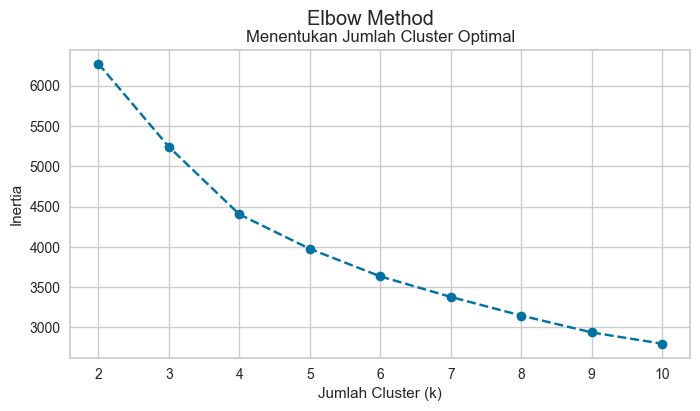

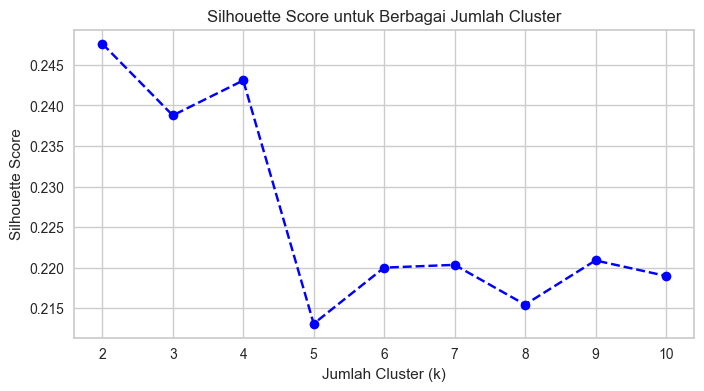

In [24]:
# Menentukan jumlah cluster optimal berdasarkan nilai Silhouette Score tertinggi
optimal_cluster = range_clusters[silhouette_vals.index(max(silhouette_vals))]
print("Jumlah cluster optimal berdasarkan Silhouette Score:", optimal_cluster)

# Visualisasi Elbow Method 
plt.figure(figsize=(8, 4))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.suptitle('Elbow Method')
plt.title('Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.xticks(range_clusters)
plt.show()

# Visualisasi Silhouette Score
plt.figure(figsize=(8, 4))
plt.plot(range_clusters, silhouette_vals, marker='o', linestyle='--', color='blue')
plt.title('Silhouette Score untuk Berbagai Jumlah Cluster')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range_clusters)
plt.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [25]:
# Mengambil fitur numerik untuk keperluan clustering
data_numerik = data_clustering[kolom_numerik]

# Standarisasi fitur numerik
scaler = StandardScaler()
data_numerik_terstandarisasi = scaler.fit_transform(data_numerik)

# Menerapkan PCA dengan jumlah komponen awal sesuai jumlah fitur numerik
pca_model = PCA(n_components=len(kolom_numerik))
hasil_pca = pca_model.fit_transform(data_numerik_terstandarisasi)

# Menentukan jumlah komponen optimal berdasarkan threshold total varians > 50%
total_varians = pca_model.explained_variance_ratio_.cumsum()
n_component_optimal = (total_varians <= 0.50).argmax() + 1

# Transformasi ulang data dengan jumlah komponen optimal
data_reduced = PCA(n_components=n_component_optimal).fit_transform(data_numerik_terstandarisasi)

# Membangun kembali model clustering menggunakan data yang telah direduksi
model_kmeans_pca = KMeans(n_clusters=optimal_cluster, random_state=42, n_init=10)
label_cluster_pca = model_kmeans_pca.fit_predict(data_reduced)

In [26]:
# Evaluasi clustering menggunakan Silhouette Score
silhouette_after_pca = silhouette_score(data_reduced, label_cluster_pca)
silhouette_before_pca = silhouette_vals[0]  # Skor sebelum PCA

# Menampilkan hasil evaluasi
print(f"\nJumlah fitur optimal setelah PCA: {n_component_optimal}")
print(f"Silhouette Score sebelum PCA: {silhouette_before_pca:.3f}")
print(f"Silhouette Score setelah PCA: {silhouette_after_pca:.3f}")

# Menyimpan hasil clustering ke dataset jika hasilnya lebih baik
if silhouette_after_pca >= 0.50:
    df['Cluster_After_FeatureSelection'] = label_cluster_pca
    print("\nHasil clustering setelah PCA memenuhi kriteria dan telah dimasukkan ke dataset.")
else:
    print("\nSilhouette Score setelah PCA kurang optimal, sehingga hasil clustering tidak digunakan.")

# Menampilkan beberapa baris data dengan cluster baru
df.head()


Jumlah fitur optimal setelah PCA: 1
Silhouette Score sebelum PCA: 0.248
Silhouette Score setelah PCA: 0.624

Hasil clustering setelah PCA memenuhi kriteria dan telah dimasukkan ke dataset.


,TransactionID,AccountID,TransactionAmount,TransactionDate,Location,DeviceID,IP Address,MerchantID,CustomerAge,TransactionDuration,...,TransactionType_Debit,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,Age_Category,Balance_Category,Cluster,Cluster_After_FeatureSelection
0,TX000001,6,-0.971275,2023-04-11 16:29:14,51,6,3,29,1.423718,-0.552443,...,True,False,False,False,False,False,Senior,Moderate,0,0
1,TX000002,7,0.269440,2023-06-27 16:44:19,56,4,4,25,1.311287,0.305314,...,True,False,False,False,False,False,Senior,Very High,2,0
2,TX000003,4,-0.586882,2023-07-10 18:16:08,56,5,6,26,-1.443277,-0.909842,...,True,False,True,False,False,True,Young,Low,1,1
3,TX000004,7,-0.387456,2023-05-05 16:32:11,55,6,8,29,-1.049768,-1.353017,...,True,False,True,False,False,True,Young,High,2,0
4,TX000005,6,-0.973468,2023-10-16 17:51:24,57,3,4,27,-1.049768,1.120184,...,False,False,True,False,False,True,Young,Moderate,2,1


In [27]:
# Tampilkan distribusi cluster sebelum proses feature selection
print("\nDistribusi data pada setiap cluster sebelum feature selection:")
print(df["Cluster"].value_counts())

# Periksa apakah hasil clustering setelah feature selection tersedia
if "Cluster_After_FeatureSelection" in df.columns:
    print("\nDistribusi data pada setiap cluster setelah seleksi fitur:")
    print(df["Cluster_After_FeatureSelection"].value_counts())
else:
    print("\nKolom hasil clustering setelah feature selection tidak tersedia dalam dataset.")
    
# Menampilkan jumlah cluster yang diterapkan setelah PCA
print(f"\nJumlah cluster yang diterapkan setelah PCA: {optimal_cluster}")


Distribusi data pada setiap cluster sebelum feature selection:
Cluster
0    851
1    772
2    659
Name: count, dtype: int64

Distribusi data pada setiap cluster setelah seleksi fitur:
Cluster_After_FeatureSelection
0    1406
1     876
Name: count, dtype: int64

Jumlah cluster yang diterapkan setelah PCA: 2


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

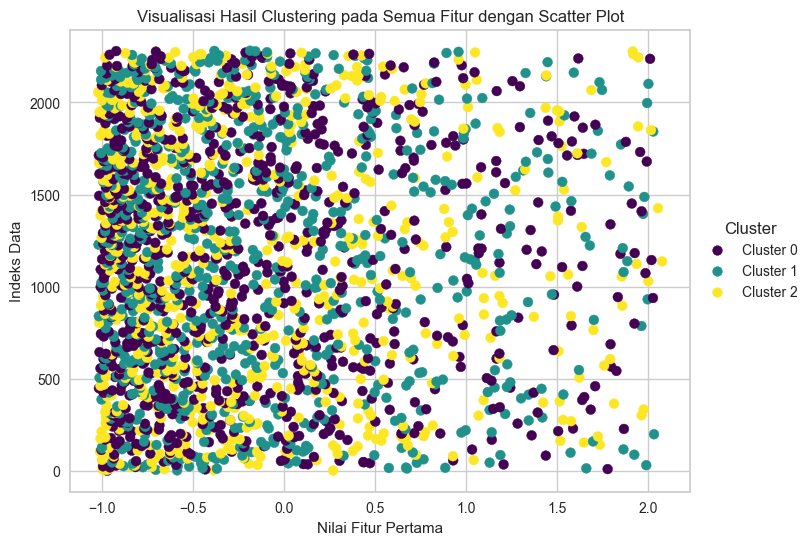

In [28]:
# Visualisasi hasil clustering menggunakan semua fitur
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_clustering.iloc[:, 0], range(len(data_clustering)), c=df['Cluster'], cmap='viridis', s=50, label="Cluster")
plt.title('Visualisasi Hasil Clustering pada Semua Fitur dengan Scatter Plot')
plt.xlabel('Nilai Fitur Pertama')
plt.ylabel('Indeks Data')
handles, labels = scatter.legend_elements()
plt.legend(handles, [f"Cluster {i}" for i in sorted(df["Cluster"].unique())], title="Cluster", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()


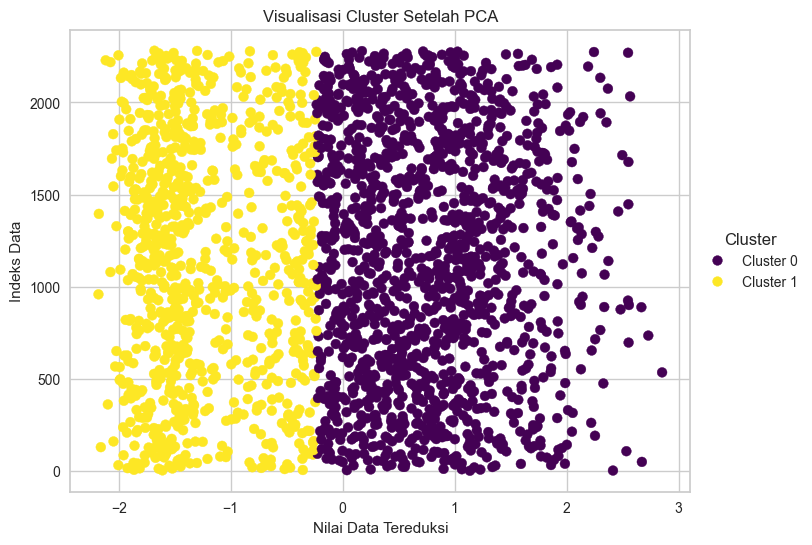

In [29]:
# Visualisasi clustering setelah Feature Selection (PCA)
plt.figure(figsize=(8, 6))
scatter_pca = plt.scatter(data_reduced[:, 0], range(len(data_reduced)), c=label_cluster_pca, cmap='viridis', s=50, label="Cluster PCA")
plt.title('Visualisasi Cluster Setelah PCA')
plt.xlabel('Nilai Data Tereduksi')
plt.ylabel('Indeks Data')
handles_pca, labels_pca = scatter_pca.legend_elements()
plt.legend(handles_pca, [f"Cluster {i}" for i in sorted(set(label_cluster_pca))], title="Cluster", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

## Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [30]:
# Gunakan data hasil reduksi dimensi dengan PCA
n_pca = data_reduced

# Melatih kembali model KMeans dengan jumlah cluster optimal
model_kmeans = KMeans(n_clusters=2, random_state=42)
model_kmeans.fit(n_pca)

# Menentukan fitur kategorikal yang ingin di-inverse transform
categorical_column = 'Balance_Category'

# Inisialisasi dan pelatihan LabelEncoder pada data asli sebelum normalisasi
label_encoder = LabelEncoder()
df[categorical_column] = label_encoder.fit_transform(df[categorical_column])

# Menambahkan label cluster ke dalam DataFrame hasil PCA yang telah dinormalisasi
df_normalized = df.copy()
df_normalized['Cluster'] = model_kmeans.labels_  # Menggunakan cluster optimal (0 dan 1)

# Melakukan inverse transform untuk fitur kategorikal dari data hasil PCA
df_normalized[categorical_column] = label_encoder.inverse_transform(df_normalized[categorical_column])

## Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [31]:
# Inisialisasi kembali StandardScaler untuk melakukan inverse transform pada fitur numerik
scaler = StandardScaler()
num_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

# Menyesuaikan scaler dengan data asli sebelum dilakukan normalisasi
scaler.fit(df[num_features])

# Mengembalikan data numerik ke skala awal menggunakan inverse transform
df_original = df_normalized.copy()  
df_original[num_features] = scaler.inverse_transform(df_normalized[num_features])

# Menganalisis statistik setiap cluster berdasarkan data yang telah dikembalikan ke skala aslinya
cluster_statistics = df_original.groupby('Cluster').agg({
    'TransactionAmount': ['mean', 'min', 'max', 'std'], 
    'CustomerAge': ['mean', 'min', 'max', 'std'],  
    'TransactionDuration': ['mean', 'min', 'max', 'std'],  
    'LoginAttempts': ['mean', 'min', 'max', 'std'], 
    'AccountBalance': ['mean', 'min', 'max', 'std'], 
    categorical_column: lambda x: x.mode()[0]  # Menentukan nilai kategori yang paling sering muncul
}).reset_index()

# Menampilkan statistik dari setiap cluster dalam skala asli
print("Statistik Deskriptif per Cluster:")
print(cluster_statistics)

Statistik Deskriptif per Cluster:
  Cluster TransactionAmount                               CustomerAge  \
                       mean       min       max       std        mean   
0       0         -0.278558 -0.903880  1.387268  0.541470    0.563303   
1       1         -0.208435 -0.904033  1.403625  0.577818   -0.901551   

                                TransactionDuration  ...            \
        min       max       std                mean  ...       std   
0 -1.492207  1.977371  0.764446           -0.075251  ...  0.968698   
1 -1.492207  1.081996  0.546925            0.070880  ...  1.035121   

  LoginAttempts                          AccountBalance                      \
           mean       min       max  std           mean       min       max   
0     -0.413587 -0.413587 -0.413587  0.0       0.521823 -1.215594  2.517681   
1     -0.413587 -0.413587 -0.413587  0.0      -0.830546 -1.277540  1.175463   

            Balance_Category  
        std         <lambda>  
0  0.867684  

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

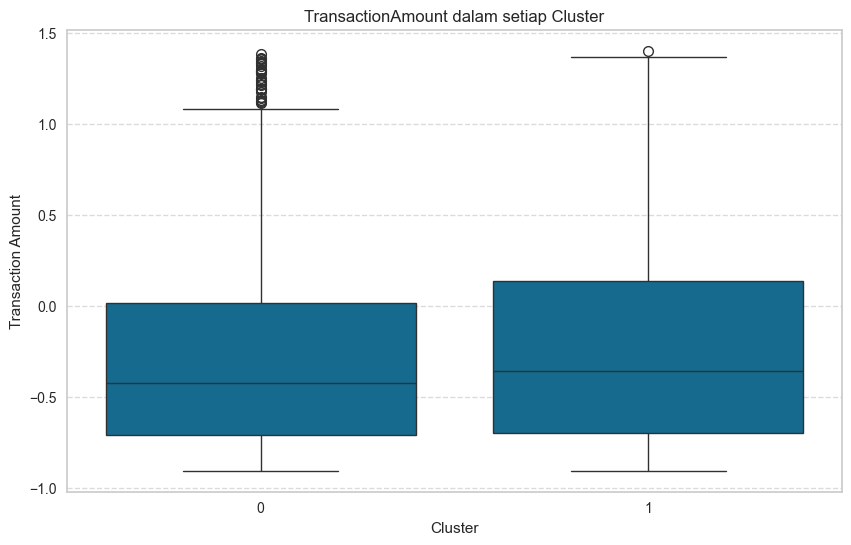

In [32]:
# Visualisasi distribusi TransactionAmount pada tiap cluster menggunakan boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='TransactionAmount', data=df_original)
plt.title("TransactionAmount dalam setiap Cluster")
plt.xlabel("Cluster")
plt.ylabel("Transaction Amount")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

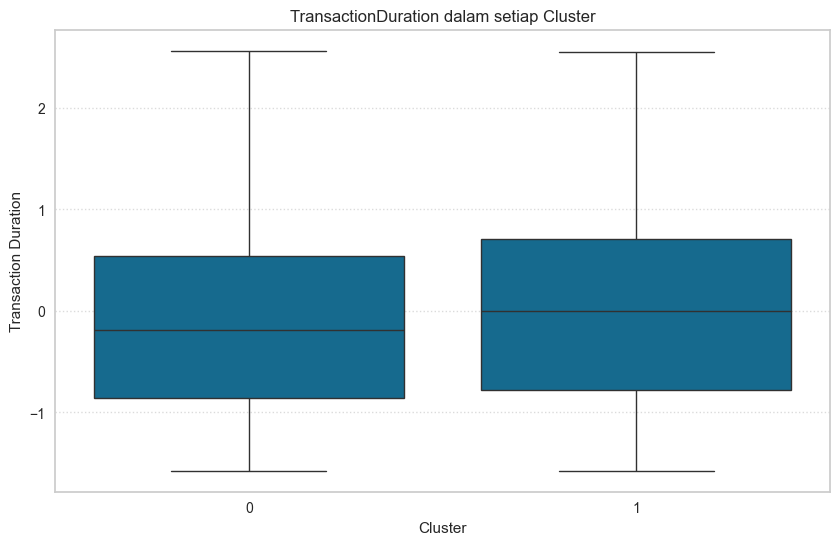

In [33]:
# Visualisasi distribusi TransactionDuration dalam setiap cluster menggunakan boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='TransactionDuration', data=df_original)
plt.title("TransactionDuration dalam setiap Cluster")
plt.xlabel("Cluster")
plt.ylabel("Transaction Duration")
plt.grid(axis='y', linestyle='dotted', alpha=0.7)
plt.show()

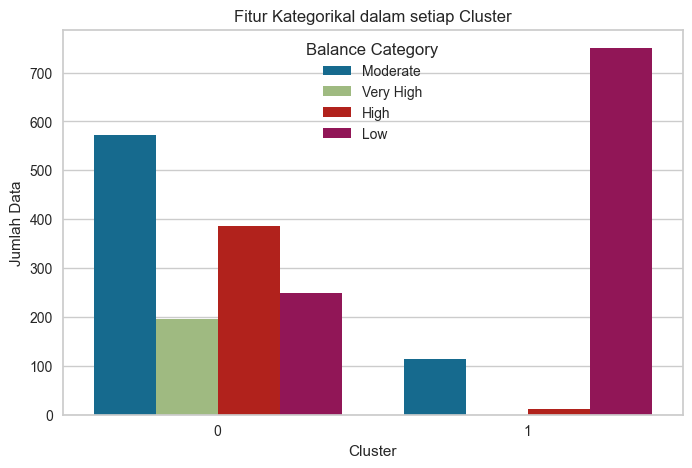

In [34]:
# Visualisasi fitur kategorikal menggunakan countplot dengan warna berbeda
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', hue=categorical_column, data=df_original)
plt.title("Fitur Kategorikal dalam setiap Cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Data")
plt.legend(title="Balance Category", loc="best")
plt.show()

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans berdasarkan data transaksi bank.

## Cluster 0:
- **Rata-rata Transaction Amount:** -0.28
- **Rata-rata Customer Age:** 0.56
- **Rata-rata Transaction Duration:** -0.07
- **Rata-rata Login Attempts:** -0.41
- **Rata-rata Account Balance:** 0.52
- **Kategori Balance yang Dominan:** Moderate
- **Analisis:** Cluster ini terdiri dari pelanggan dengan jumlah transaksi yang lebih rendah dibandingkan rata-rata tetapi memiliki saldo akun yang lebih tinggi. Mayoritas pelanggan dalam kelompok ini memiliki kategori saldo "Moderate," yang menunjukkan bahwa mereka memiliki keseimbangan keuangan yang relatif stabil. Durasi transaksi mereka juga cenderung lebih singkat, mungkin karena mereka adalah pengguna yang lebih terbiasa dengan sistem perbankan.

## Cluster 1:
- **Rata-rata Transaction Amount:** -0.20
- **Rata-rata Customer Age:** -0.90
- **Rata-rata Transaction Duration:** 0.07
- **Rata-rata Login Attempts:** -0.41
- **Rata-rata Account Balance:** -0.83
- **Kategori Balance yang Dominan:** Low
- **Analisis:** Cluster ini mencakup pelanggan dengan jumlah transaksi yang sedikit lebih tinggi dibandingkan dengan Cluster 0, tetapi dengan saldo akun yang lebih rendah. Mayoritas pelanggan dalam cluster ini berada dalam kategori saldo "Low," yang berarti mereka mungkin memiliki keterbatasan dalam akses keuangan atau sering menghabiskan saldo mereka lebih cepat. Usia pelanggan dalam cluster ini juga lebih rendah dibandingkan dengan Cluster 0, yang menunjukkan bahwa kelompok ini mungkin terdiri dari pengguna yang lebih muda dengan kebiasaan pengelolaan keuangan yang berbeda.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [35]:
# Menyimpan hasil clustering ke dalam file CSV
if 'Cluster' in df.columns:
    df.to_csv("Dataset_clustering.csv", index=False)
    print("Dataset_clustering.csv telah berhasil tersimpan.")
else:
    print("Tidak ditemukan kolom 'Cluster' dalam dataset. Pastikan proses clustering telah selesai dilakukan.")

Dataset_clustering.csv telah berhasil tersimpan.
